<a href="https://colab.research.google.com/github/antoniogss/json_data/blob/main/json_file_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import requests as rq
import warnings as war

#Ignore harmeless warnings
war.filterwarnings('ignore')

In [2]:
url = 'http://api.nobelprize.org/v1/prize.json'

data = rq.get(url).json()

In [3]:
# for k,v in data.items():
#   print(json.dumps(data, indent=4)) #dumps: string

In [4]:
type(data)

dict

In [5]:
#keys of the dictionary

data.keys()

dict_keys(['prizes'])

In [6]:
type(data['prizes'])

list

In [7]:
# Get first value of the data['laureates'] list

data['prizes'][0]

{'year': '2021',
 'category': 'chemistry',
 'laureates': [{'id': '1002',
   'firstname': 'Benjamin',
   'surname': 'List',
   'motivation': '"for the development of asymmetric organocatalysis"',
   'share': '2'},
  {'id': '1003',
   'firstname': 'David',
   'surname': 'MacMillan',
   'motivation': '"for the development of asymmetric organocatalysis"',
   'share': '2'}]}

In [83]:
df_1 = pd.DataFrame(data.items(),columns=['prizes','key']).\
explode('key')

df_1.head()

,prizes,key
0,prizes,"{'year': '2021', 'category': 'chemistry', 'lau..."
0,prizes,"{'year': '2021', 'category': 'economics', 'lau..."
0,prizes,"{'year': '2021', 'category': 'literature', 'la..."
0,prizes,"{'year': '2021', 'category': 'peace', 'laureat..."
0,prizes,"{'year': '2021', 'category': 'physics', 'overa..."


In [84]:
df_1 = pd.json_normalize(json.loads(df_1.to_json(orient='records')))

df_1.head()

,prizes,key.year,key.category,key.laureates,key.overallMotivation
0,prizes,2021,chemistry,"[{'id': '1002', 'firstname': 'Benjamin', 'surn...",NaN
1,prizes,2021,economics,"[{'id': '1007', 'firstname': 'David', 'surname...",NaN
2,prizes,2021,literature,"[{'id': '1004', 'firstname': 'Abdulrazak', 'su...",NaN
3,prizes,2021,peace,"[{'id': '1005', 'firstname': 'Maria', 'surname...",NaN
4,prizes,2021,physics,"[{'id': '999', 'firstname': 'Syukuro', 'surnam...","""for groundbreaking contributions to our under..."


In [85]:
df_1[['laureate_1','laureate_2','laureate_3']] = pd.json_normalize(df_1['key.laureates'])
df_1.head()

,prizes,key.year,key.category,key.laureates,key.overallMotivation,laureate_1,laureate_2,laureate_3
0,prizes,2021,chemistry,"[{'id': '1002', 'firstname': 'Benjamin', 'surn...",NaN,"{'id': '1002', 'firstname': 'Benjamin', 'surna...","{'id': '1003', 'firstname': 'David', 'surname'...",None
1,prizes,2021,economics,"[{'id': '1007', 'firstname': 'David', 'surname...",NaN,"{'id': '1007', 'firstname': 'David', 'surname'...","{'id': '1008', 'firstname': 'Joshua', 'surname...","{'id': '1009', 'firstname': 'Guido', 'surname'..."
2,prizes,2021,literature,"[{'id': '1004', 'firstname': 'Abdulrazak', 'su...",NaN,"{'id': '1004', 'firstname': 'Abdulrazak', 'sur...",None,None
3,prizes,2021,peace,"[{'id': '1005', 'firstname': 'Maria', 'surname...",NaN,"{'id': '1005', 'firstname': 'Maria', 'surname'...","{'id': '1006', 'firstname': 'Dmitry', 'surname...",None
4,prizes,2021,physics,"[{'id': '999', 'firstname': 'Syukuro', 'surnam...","""for groundbreaking contributions to our under...","{'id': '999', 'firstname': 'Syukuro', 'surname...","{'id': '1000', 'firstname': 'Klaus', 'surname'...","{'id': '1001', 'firstname': 'Giorgio', 'surnam..."


In [86]:
df_1[['id_1',
      'firstname_1',
      'surname_1',
      'motivation_1',
      'share_1']]=pd.\
      json_normalize(df_1['laureate_1'])

df_1['name_1'] = df_1['firstname_1'] + ' ' + df_1['surname_1']

df_1.drop(['firstname_1', 
           'surname_1',
           'laureate_1',
           'key.overallMotivation',
           'prizes',
           'key.laureates'], 
           axis=1, 
           inplace=True
          )

df_1.head()

,key.year,key.category,laureate_2,laureate_3,id_1,motivation_1,share_1,name_1
0,2021,chemistry,"{'id': '1003', 'firstname': 'David', 'surname'...",None,1002,"""for the development of asymmetric organocatal...",2,Benjamin List
1,2021,economics,"{'id': '1008', 'firstname': 'Joshua', 'surname...","{'id': '1009', 'firstname': 'Guido', 'surname'...",1007,"""for his empirical contributions to labour eco...",2,David Card
2,2021,literature,None,None,1004,"""for his uncompromising and compassionate pene...",1,Abdulrazak Gurnah
3,2021,peace,"{'id': '1006', 'firstname': 'Dmitry', 'surname...",None,1005,"""for their efforts to safeguard freedom of exp...",2,Maria Ressa
4,2021,physics,"{'id': '1000', 'firstname': 'Klaus', 'surname'...","{'id': '1001', 'firstname': 'Giorgio', 'surnam...",999,"""for the physical modelling of Earth’s climate...",4,Syukuro Manabe


In [87]:
df_1[['id_2',
      'firstname_2',
      'surname_2',
      'motivation_2',
      'share_2']]=pd.\
      json_normalize(df_1['laureate_2'])

df_1['name_2'] = df_1['firstname_2'] + ' ' + df_1['surname_2']

df_1.drop(['firstname_2', 
           'surname_2',
           'laureate_2'],
           axis=1, 
           inplace=True
          )

df_1.head()

,key.year,key.category,laureate_3,id_1,motivation_1,share_1,name_1,id_2,motivation_2,share_2,name_2
0,2021,chemistry,None,1002,"""for the development of asymmetric organocatal...",2,Benjamin List,1003,"""for the development of asymmetric organocatal...",2,David MacMillan
1,2021,economics,"{'id': '1009', 'firstname': 'Guido', 'surname'...",1007,"""for his empirical contributions to labour eco...",2,David Card,1008,"""for their methodological contributions to the...",4,Joshua Angrist
2,2021,literature,None,1004,"""for his uncompromising and compassionate pene...",1,Abdulrazak Gurnah,NaN,NaN,NaN,NaN
3,2021,peace,None,1005,"""for their efforts to safeguard freedom of exp...",2,Maria Ressa,1006,"""for their efforts to safeguard freedom of exp...",2,Dmitry Muratov
4,2021,physics,"{'id': '1001', 'firstname': 'Giorgio', 'surnam...",999,"""for the physical modelling of Earth’s climate...",4,Syukuro Manabe,1000,"""for the physical modelling of Earth’s climate...",4,Klaus Hasselmann


In [88]:
df_1[['id_3',
      'firstname_3',
      'surname_3',
      'motivation_3',
      'share_3']]=pd.\
      json_normalize(df_1['laureate_3'])

df_1['name_3'] = df_1['firstname_3'] + ' ' + df_1['surname_3']

df_1.drop(['firstname_3', 
           'surname_3',
           'laureate_3'],
           axis=1, 
           inplace=True
          )

df_1.head()

,key.year,key.category,id_1,motivation_1,share_1,name_1,id_2,motivation_2,share_2,name_2,id_3,motivation_3,share_3,name_3
0,2021,chemistry,1002,"""for the development of asymmetric organocatal...",2,Benjamin List,1003,"""for the development of asymmetric organocatal...",2,David MacMillan,NaN,NaN,NaN,NaN
1,2021,economics,1007,"""for his empirical contributions to labour eco...",2,David Card,1008,"""for their methodological contributions to the...",4,Joshua Angrist,1009,"""for their methodological contributions to the...",4,Guido Imbens
2,2021,literature,1004,"""for his uncompromising and compassionate pene...",1,Abdulrazak Gurnah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,peace,1005,"""for their efforts to safeguard freedom of exp...",2,Maria Ressa,1006,"""for their efforts to safeguard freedom of exp...",2,Dmitry Muratov,NaN,NaN,NaN,NaN
4,2021,physics,999,"""for the physical modelling of Earth’s climate...",4,Syukuro Manabe,1000,"""for the physical modelling of Earth’s climate...",4,Klaus Hasselmann,1001,"""for the discovery of the interplay of disorde...",2,Giorgio Parisi


In [89]:
df_2 = df_1[['key.year',
             'key.category',
             'id_1', 
             'name_1',
             'motivation_1',
             'share_1']]

df_2.rename(columns={"key.year": "year",
                     "key.category": "category",
                     "id_1": "id",
                     "name_1" : "name",
                     "motivation_1": "motivation", 
                     "share_1": "share"},
            inplace = True
            )

df_2.head()

,year,category,id,name,motivation,share
0,2021,chemistry,1002,Benjamin List,"""for the development of asymmetric organocatal...",2
1,2021,economics,1007,David Card,"""for his empirical contributions to labour eco...",2
2,2021,literature,1004,Abdulrazak Gurnah,"""for his uncompromising and compassionate pene...",1
3,2021,peace,1005,Maria Ressa,"""for their efforts to safeguard freedom of exp...",2
4,2021,physics,999,Syukuro Manabe,"""for the physical modelling of Earth’s climate...",4


In [90]:
df_3 = df_1[['key.year',
             'key.category',
             'id_2',
             'name_2', 
             'motivation_2',
             'share_2']]

df_3.rename(columns={"key.year": "year",
                     "key.category": "category",
                     "id_2": "id",
                     "name_2" : "name",
                     "motivation_2": "motivation", 
                     "share_2": "share"},
            inplace = True
            )

df_3.head()

,year,category,id,name,motivation,share
0,2021,chemistry,1003,David MacMillan,"""for the development of asymmetric organocatal...",2
1,2021,economics,1008,Joshua Angrist,"""for their methodological contributions to the...",4
2,2021,literature,NaN,NaN,NaN,NaN
3,2021,peace,1006,Dmitry Muratov,"""for their efforts to safeguard freedom of exp...",2
4,2021,physics,1000,Klaus Hasselmann,"""for the physical modelling of Earth’s climate...",4


In [91]:
df_4 = df_1[['key.year',
             'key.category',
             'id_3', 
             'name_3',
             'motivation_3',
             'share_3']]

df_4.rename(columns={"key.year": "year",
                     "key.category": "category",
                     "id_3": "id",
                     "name_3" : "name",
                     "motivation_3": "motivation", 
                     "share_3": "share"},
            inplace = True
            )

df_4.head()

,year,category,id,name,motivation,share
0,2021,chemistry,NaN,NaN,NaN,NaN
1,2021,economics,1009,Guido Imbens,"""for their methodological contributions to the...",4
2,2021,literature,NaN,NaN,NaN,NaN
3,2021,peace,NaN,NaN,NaN,NaN
4,2021,physics,1001,Giorgio Parisi,"""for the discovery of the interplay of disorde...",2


In [133]:
df_5 = pd.concat([df_2,df_3], axis=0)

df = pd.concat([df_5,df_4], axis=0)

df.head()

,year,category,id,name,motivation,share
0,2021,chemistry,1002,Benjamin List,"""for the development of asymmetric organocatal...",2
1,2021,economics,1007,David Card,"""for his empirical contributions to labour eco...",2
2,2021,literature,1004,Abdulrazak Gurnah,"""for his uncompromising and compassionate pene...",1
3,2021,peace,1005,Maria Ressa,"""for their efforts to safeguard freedom of exp...",2
4,2021,physics,999,Syukuro Manabe,"""for the physical modelling of Earth’s climate...",4


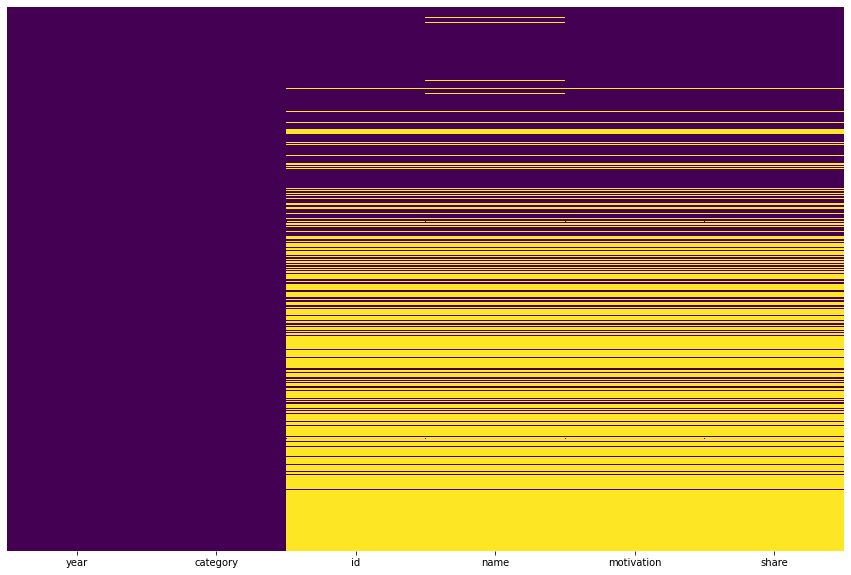

In [134]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            ax=ax
          );

In [135]:
#Drop the rows where at least one element is missing

df = df.dropna(subset=['id', 
                       'name']
              )

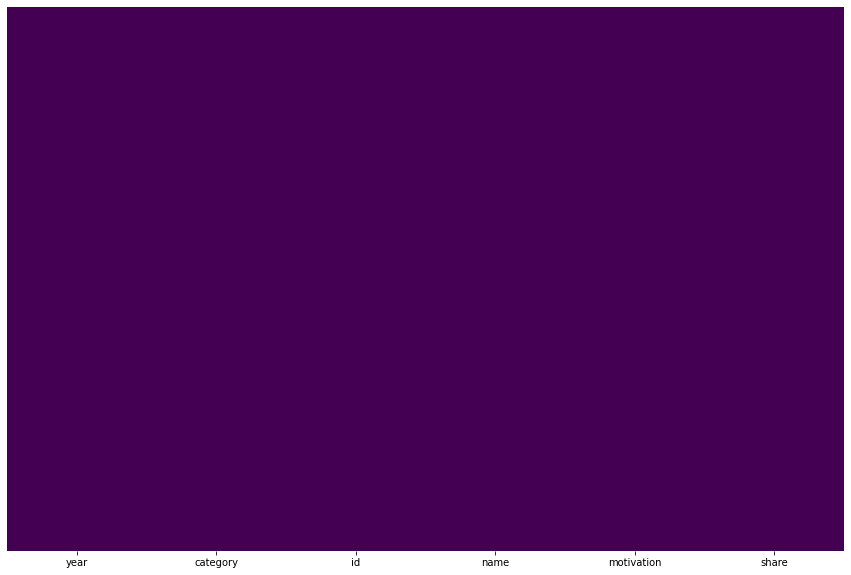

In [136]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            ax=ax
          );

In [138]:
df.head()

,year,category,id,name,motivation,share
0,2021,chemistry,1002,Benjamin List,"""for the development of asymmetric organocatal...",2
1,2021,economics,1007,David Card,"""for his empirical contributions to labour eco...",2
2,2021,literature,1004,Abdulrazak Gurnah,"""for his uncompromising and compassionate pene...",1
3,2021,peace,1005,Maria Ressa,"""for their efforts to safeguard freedom of exp...",2
4,2021,physics,999,Syukuro Manabe,"""for the physical modelling of Earth’s climate...",4


In [150]:
df[['year',
    'id',
    'share']] = df[['year',
                    'id',
                    'share']].\
astype(int)

In [149]:
print('How many years has the Nobel'+ 
      ' Prize been awarded?\n',
      df['year'].max()-df['year'].min()
      )

How many years has the Nobel Prize been awarded?
 120


In [147]:
print('Number of laureates:',df['id'].max())

Number of laureates: 1009


In [ ]:
df_1.drop(['firstname_3', 
           'surname_3',
           'laureate_3'],
           axis=1, 
           inplace=True
          )

In [164]:
filt = (df['category'] == 'chemistry') #& (df['year'] >= 2017)

df.loc[filt].\
  sort_values(by=['year'], 
            ascending=False).\
                  drop(['category',
                        'share'],
                       axis=1)

,year,id,name,motivation
0,2021,1002,Benjamin List,"""for the development of asymmetric organocatal..."
0,2021,1003,David MacMillan,"""for the development of asymmetric organocatal..."
6,2020,992,Jennifer A. Doudna,"""for the development of a method for genome ed..."
6,2020,991,Emmanuelle Charpentier,"""for the development of a method for genome ed..."
12,2019,977,M. Stanley Whittingham,"""for the development of lithium-ion batteries"""
...,...,...,...,...
633,1905,164,Adolf von Baeyer,"""in recognition of his services in the advance..."
638,1904,163,Sir William Ramsay,"""in recognition of his services in the discove..."
643,1903,162,Svante Arrhenius,"""in recognition of the extraordinary services ..."
648,1902,161,Emil Fischer,"""in recognition of the extraordinary services ..."


In [175]:
category = 'chemistry'

print('Nobel Prize Motivation List by year:'+
      ' ' + category + '\n\n')

filt = (df['category'] == category) #& (df['year'] >= 2017)

df.loc[filt].\
  sort_values(by=['year'], 
              ascending=False).\
                  drop(['category',
                        'share',
                        'id',
                        'name'],
                       axis=1).\
                         drop_duplicates()

Nobel Prize Motivation List by year: chemistry




,year,motivation
0,2021,"""for the development of asymmetric organocatal..."
6,2020,"""for the development of a method for genome ed..."
12,2019,"""for the development of lithium-ion batteries"""
18,2018,"""for the phage display of peptides and antibod..."
18,2018,"""for the directed evolution of enzymes"""
...,...,...
633,1905,"""in recognition of his services in the advance..."
638,1904,"""in recognition of his services in the discove..."
643,1903,"""in recognition of the extraordinary services ..."
648,1902,"""in recognition of the extraordinary services ..."
